# 1. Importing Packages 

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn import linear_model


# Task 1 - 2. Test data

Datasets have been taken from data.gov.in as instructed ( https://data.gov.in/catalog/housing-price-index-india )

In [7]:
tr=pd.read_csv("housing.csv",delimiter=",")
td=pd.read_csv("housing_test.csv",delimiter=",")
td.head()

,Particulars,12-2010,03-2011,06-2011,09-2011,12-2011,03-2012,06-2012,09-2012,12-2012,03-2013
0,All India,132.6,141.7,152.0,157.8,164.1,176.9,188.6,194.3,206.8,211.2
1,Ahmedabad,128.8,128.7,152.3,162.8,171.8,177.2,176.6,183.4,187.8,193.5
2,Bangalore,104.7,113.6,116.9,116.0,146.1,140.6,140.2,143.0,147.9,148.3
3,Chennai,118.4,106.8,106.3,113.9,120.3,117.0,133.9,129.5,149.2,148.0
4,Delhi,111.4,135.2,152.8,153.0,168.6,195.3,217.3,225.2,247.8,259.2


# 3.Train data 

In [8]:
tr.head()

,Particulars,06-2011,09-2011,12-2011,03-2012,06-2012,09-2012,12-2012,03-2013,06-2013,09-2013
0,All India,116.0,119.4,125.5,134.1,142.6,147.1,157.0,160.8,162.3,169.2
1,Ahmedabad,121.3,130.4,137.1,141.0,140.8,146.4,150.6,155.0,161.9,171.7
2,Bangalore,110.7,107.8,138.6,133.3,133.3,136.6,141.2,141.9,142.3,150.4
3,Chennai,101.2,110.4,110.7,108.2,119.2,117.8,137.6,137.4,138.3,150.0
4,Delhi,126.8,124.8,136.7,158.2,177.3,183.2,200.7,213.1,214.8,215.7


# 4.Splitting Data and Visual Representation of Train Data

Data is segregated into X and Y varibles for then X is plotted on the graph where different colours of lines indicate different cities and on X axis dates are represented as general numbers.

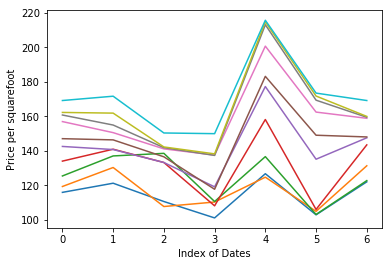

In [9]:
l=tr.columns
X=tr.iloc[:,1:11]
Y=tr.iloc[:,10]
X_test=td.iloc[:,1:11]
Y_test=td.iloc[:,10]
plt.plot(X)
plt.xlabel('Index of Dates')
plt.ylabel('Price per squarefoot')
plt.show()

# 5. Fitting Models and Predictions

Generally, Regression models are used in Trend Forecasting and cases involving continous data.Here, three types of regression models are used and they are Linear Regression, Lasso and Ridge Regression.

In [11]:
#Linear Regression
model=LinearRegression()
model.fit(X,Y)

#Lasso
reg = linear_model.Lasso(alpha = 3)
reg.fit(X,Y)

#Ridge Regression
reg1 = linear_model.RidgeCV()
reg1.fit(X,Y) 


RidgeCV(alphas=(0.1, 1.0, 10.0), cv=None, fit_intercept=True, gcv_mode=None,
    normalize=False, scoring=None, store_cv_values=False)

In [12]:
#Linear Regression
pred=model.predict(X_test)
print(pred)

#Lasso
pre=reg.predict(X_test)
print(pre)

#Ridge Regression
pr=reg1.predict(X_test)
print(pr)


[ 213.129736    193.70199971  152.05606139  153.01443207  255.03580988
  262.85017989  251.64740363]
[ 210.66140084  193.20555444  149.24686093  149.07812265  257.16785885
  256.59467943  247.74061535]
[ 213.15870092  192.36610547  150.57053352  148.09987839  255.17186365
  262.78227269  254.74056938]


In [14]:
#True Values
Y_test

0    211.2
1    193.5
2    148.3
3    148.0
4    259.2
5    258.6
6    248.6
Name:  03-2013, dtype: float64

Comparing True values and predictions we get to know that Lasso performs well in predicting the output and the reason behind this is that Lasso performs well in the case of lesser parameters and data when compared to other Regression Models.The Alpha paramter in the method helps in crossvalidation and it acts more like no of iterations to be performed.

# 6. Scatter plot  

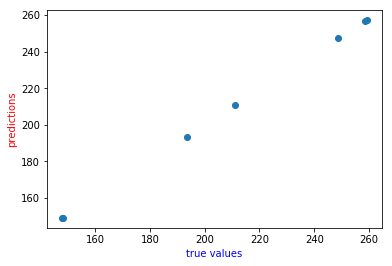

In [15]:
plt.scatter(Y_test,pre)
plt.xlabel("true values",color="blue")
plt.ylabel("predictions",color="red")
plt.show()

In [17]:
# Converting predictions and expected values into list to perform the opreation provided in the Problem Statemnt 
test1=[]
for i in Y_test:
    test1.append(float(i))
print(test1)
p1=[]
for i in pre:
    p1.append(float(i))
print(p1)

[211.2, 193.5, 148.3, 148.0, 259.2, 258.6, 248.6]
[210.6614008370963, 193.20555443888, 149.2468609270623, 149.07812264870407, 257.1678588479821, 256.59467943089163, 247.74061535383493]


# 7. Formulating the Normalized Distance and Score as per Problem Statement

In [18]:
difference=[]

# Normalized Distance from Expected Answer.
dev=[]


for i in range(0,len(p1)):
    diff=p1[i]-test1[i]
    difference.append(diff)
    dev.append(abs(diff/test1[i]))
print("Difference:",difference)
print("Deviation unadjusted:",dev)

Difference: [-0.5385991629036937, -0.29444556111999987, 0.9468609270622892, 1.078122648704067, -2.032141152017914, -2.0053205691083917, -0.8593846461650685]
Deviation unadjusted: [0.0025501854304152164, 0.001521682486408268, 0.006384766871627034, 0.007284612491243695, 0.007840050740809854, 0.007754526562677461, 0.003456897209030847]


In [20]:
# Deviation after adjustments 
de_adj=[]

#Indivual Scores
sco=[]

for i in range(0,len(p1)):
    de_adj.append(max(dev[i]-0.1,0))
for i in range(0,len(p1)):    
    sco.append(max(1-de_adj[i],0))
print("Deviation Adjusted:",de_adj)
print("scores list  :",sco) 

Deviation Adjusted: [0, 0, 0, 0, 0, 0, 0]
scores list  : [1, 1, 1, 1, 1, 1, 1]


In [23]:
# Calculating Score
 
sum=0
for i in range(0,len(p1)):
    sum=sum+sco[i]
avg=sum/len(p1)
score=avg*10
print("score:",score)

score: 10.0


                            ------Completion of Task 1--------

# Task 2 - 8. Input and Output as per Instructed Fomat.

In a file input_train.txt, input has been given in instrcuetd format with respective parameters and they are separated using Spaces.

In [35]:
# Accessing file to read the input
file=open("input_train.txt","r")

# creating and writing csv file to perform model fitting 
f1=open("inp.csv","a")

f2=file.readlines()
for line in f2:
    str=line.replace("\t",",")
    f1.write(str)
f1.close()
file.close()

                                 Data provided in the form of text file and separated by spaces

![Train Data](img/inp_train.png)

In [36]:
# Reading data from csv file that has beenn built.
data=pd.read_csv("inp.csv",delimiter=" ")

In [37]:
#splitting data
x=data.iloc[:,0:2]
y=data.iloc[:,2]

In [38]:
reg = linear_model.Lasso(alpha = 3)
reg.fit(x,y)

Lasso(alpha=3, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [40]:
# Accessing test data 
h=open("input_test.txt","r")

#creating and writing test data into csv file
h1=open("outp.csv","a")

h2=h.readlines()
for line in h2:
    str=line.replace("\t",",")
    h1.write(str)
h1.close()
h.close()
test_data=pd.read_csv("outp.csv",delimiter=" ")


In [41]:
x_test=test_data.iloc[:,0:2]
y_test=test_data.iloc[:,2]

In [44]:
prediction=reg.predict(x_test)
print(prediction)


[ 122.40605586  126.94617744  126.44171949  136.53087857]


As the data taken is small, we achieve some deviation in this case when compared to Task 1 where dataset was enough large to perform predictions.

Finding scores and Deviation.

In [51]:
difference1=[]
dev1=[]
d_adj1=[]
for i in range(0,len(y_test)):
    diff1=prediction[i]-y_test[i]
    difference1.append(diff1)
    dev1.append(abs(diff/y_test[i]))
print("Difference:",difference1)
print("Deviation unadjusted:",dev1)
de_adj1=[]
sco1=[]

for i in range(0,len(y_test)):
    de_adj1.append(max(dev1[i]-0.1,0))
for i in range(0,len(y_test)):    
    sco1.append(max(1-de_adj1[i],0))
print("Deviation Adjusted:",de_adj1)
print("scores list  :",sco1)    

Difference: [17.186055859137838, -15.733822556162721, -6.4982805100182048, 6.8208785670916825]
Deviation unadjusted: [0.0081675028147221874, 0.0060231612430969193, 0.0064644549884539529, 0.0066254309318099485]
Deviation Adjusted: [0, 0, 0, 0]
scores list  : [1, 1, 1, 1]


In [53]:
sum1=0
for i in range(0,len(y_test)):
    sum1=sum1+sco1[i]
avg1=sum1/len(y_test)
score1=avg1*10
print("score:",score1)

score: 10.0


                           --------Completion of Task-2--------